# Price Elasticity of Demand

## 0. Imports

### 0.1. Libraries

In [1]:
##### Data manipulation 
import pandas               as pd
import numpy                as np

##### Data visualization
import seaborn              as sns
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import matplotlib.dates     as mdates

##### Statistics and Machine learning 
import statsmodels.api      as sm

##### Other libraries

import datetime 
import inflection
import warnings
import lxml

### 0.2. Settings

In [2]:
##### Ignoring warnings
warnings.filterwarnings('ignore')

##### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.set_option('display.max_columns', None)

##### Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (20, 5)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'lightgray'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.titlesize'] = 25
mpl.rcParams['figure.dpi'] = 100

sns.set_palette('rocket')

### 0.3. Functions

In [3]:
##### Functions

def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.

    Args:
        df: the DataFrame we want to know more about.
    
    Returns: a text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {:,}'.format(df.shape[0]))
    print('Number of columns: {:,}'.format(df.shape[1]))

    return None

def bar_plot(data, x, y, title, xlabel, ylabel, rotation=0, palette='rocket'):
    """
    Summary: This function plots a barplot in a giving configuration.

    Args: 
        data: the dataset we want to plot.
        x: the column for the x axis.
        y: the column for the y axis.
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.
        palette: the color palette. default as 'rocket'

    Returns: None
    """

    sns.barplot(data=data, x=x, y=y, palette=palette)

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=rotation)
    plt.tick_params(left=False, bottom=False);

    return None

def set_image(title, xlabel, ylabel, rotation=0):
    """
    Summary: This function sets the image configuration.

    Args:
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.

    Returns: None
    """

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=rotation)
    plt.tick_params(left=False, bottom=False);

    return None


### 0.4. Loading data

In [4]:
df_raw = pd.read_csv('../data/raw/price_elasticity_of_demand.csv')

df = df_raw.copy()

## 1. Data description

In [5]:
df.head()

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.000,64.990,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.002,3.881
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.000,69.000,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.002,3.881
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.000,66.000,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.761,3.881
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.990,74.990,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.524,3.881
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.990,69.990,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253,3.881


### 1.1. Data Dimensions

In [6]:
df_shape(df)

Number of rows: 23,151
Number of columns: 32


### 1.2. Columns

In [7]:
df.columns.to_list()

['Unnamed: 0',
 'Date_imp',
 'Date_imp_d',
 'Cluster',
 'Category_name',
 'name',
 'price',
 'disc_price',
 'merchant',
 'condition',
 'Disc_percentage',
 'isSale',
 'Imp_count',
 'brand',
 'p_description',
 'currency',
 'dateAdded',
 'dateSeen',
 'dateUpdated',
 'imageURLs',
 'manufacturer',
 'shipping',
 'sourceURLs',
 'weight',
 'Date_imp_d.1',
 'Day_n',
 'month',
 'month_n',
 'day',
 'Week_Number',
 'Zscore_1',
 'price_std']

### 1.3. Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23151 non-null  int64  
 1   Date_imp         23151 non-null  object 
 2   Date_imp_d       23151 non-null  object 
 3   Cluster          23151 non-null  int64  
 4   Category_name    23151 non-null  object 
 5   name             23151 non-null  object 
 6   price            23151 non-null  float64
 7   disc_price       23151 non-null  float64
 8   merchant         23151 non-null  object 
 9   condition        23151 non-null  object 
 10  Disc_percentage  23151 non-null  float64
 11  isSale           23151 non-null  object 
 12  Imp_count        23151 non-null  int64  
 13  brand            23151 non-null  object 
 14  p_description    23151 non-null  object 
 15  currency         23151 non-null  object 
 16  dateAdded        23151 non-null  object 
 17  dateSeen    

### 1.4. Describing Data

In [9]:
df.describe()

,Unnamed: 0,Cluster,price,disc_price,Disc_percentage,Imp_count,month,day,Week_Number,Zscore_1,price_std
count,23151.000,23151.000,23151.000,23151.000,23151.000,23151.000,23151.000,23151.000,23151.000,22980.000,23151.000
mean,15338.318,22.683,513.038,494.104,0.017,6.561,7.651,15.694,31.343,0.153,61.993
std,8528.806,15.577,859.110,808.589,0.078,5.403,2.593,9.682,11.316,0.863,125.495
min,4.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,-2.996,0.004
25%,7897.500,8.000,82.990,79.990,0.000,2.000,6.000,7.000,23.000,-0.676,7.771
50%,15613.000,20.000,199.990,199.000,0.000,5.000,8.000,16.000,32.000,0.207,18.765
75%,22678.000,35.000,540.000,516.490,0.000,10.000,9.000,24.000,38.000,0.707,59.176
max,29592.000,57.000,10879.950,10879.950,0.800,31.000,12.000,31.000,51.000,3.000,1423.902


### 1.5. Checking NaN

In [10]:
df.isna().sum()

Unnamed: 0             0
Date_imp               0
Date_imp_d             0
Cluster                0
Category_name          0
name                   0
price                  0
disc_price             0
merchant               0
condition              0
Disc_percentage        0
isSale                 0
Imp_count              0
brand                  0
p_description          0
currency               0
dateAdded              0
dateSeen               0
dateUpdated            0
imageURLs          22696
manufacturer       10639
shipping           11497
sourceURLs          4930
weight                68
Date_imp_d.1           0
Day_n                  0
month                  0
month_n                0
day                    0
Week_Number            0
Zscore_1             171
price_std              0
dtype: int64

## 2. Data Exploration and Preprocessing

### 2.1. Cleaning Up

In [11]:
df = df.drop(columns={
    'Unnamed: 0', # a second index.
    'Date_imp', # full datetime imputation. other one will be used instead.
    'condition', # all items are considered as 'New'.
    'Imp_count', # informative data. not relevant for this analysis.
    'p_description', # informative data. not relevant for this analysis.
    'currency', # all items are in USD currency.
    'dateAdded', # informative data. not relevant for this analysis.
    'dateSeen', # informative data. not relevant for this analysis.
    'dateUpdated', # informative data. not relevant for this analysis.
    'imageURLs', # informative data. not relevant for this analysis.
    'shipping', # informative data. not relevant for this analysis.
    'sourceURLs', # informative data. not relevant for this analysis.
    'weight', # informative data. not relevant for this analysis.
    'Date_imp_d.1', # duplicated.
    'Zscore_1' # statistical test.
    }
)

### 2.2. Renaming Columns

In [12]:
old_columns = df.columns.tolist()

snake_case = lambda x: inflection.underscore(x)

new_columns = list(map(snake_case, old_columns))

df.columns = new_columns

df.columns.tolist()

['date_imp_d',
 'cluster',
 'category_name',
 'name',
 'price',
 'disc_price',
 'merchant',
 'disc_percentage',
 'is_sale',
 'brand',
 'manufacturer',
 'day_n',
 'month',
 'month_n',
 'day',
 'week_number',
 'price_std']

### 2.2. Datetime Variables

In [13]:
df.rename(columns={'date_imp_d': 'date'}, inplace=True)

In [14]:
df['date'] = pd.to_datetime(df['date'])

### 2.3. Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             23151 non-null  datetime64[ns]
 1   cluster          23151 non-null  int64         
 2   category_name    23151 non-null  object        
 3   name             23151 non-null  object        
 4   price            23151 non-null  float64       
 5   disc_price       23151 non-null  float64       
 6   merchant         23151 non-null  object        
 7   disc_percentage  23151 non-null  float64       
 8   is_sale          23151 non-null  object        
 9   brand            23151 non-null  object        
 10  manufacturer     12512 non-null  object        
 11  day_n            23151 non-null  object        
 12  month            23151 non-null  int64         
 13  month_n          23151 non-null  object        
 14  day              23151 non-null  int64

In [16]:
df['is_sale'].unique().tolist()

['Yes', 'No']

In [17]:
mapping = {'Yes': 1, 'No': 0}

df['is_sale'] = df['is_sale'].map(mapping)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             23151 non-null  datetime64[ns]
 1   cluster          23151 non-null  int64         
 2   category_name    23151 non-null  object        
 3   name             23151 non-null  object        
 4   price            23151 non-null  float64       
 5   disc_price       23151 non-null  float64       
 6   merchant         23151 non-null  object        
 7   disc_percentage  23151 non-null  float64       
 8   is_sale          23151 non-null  int64         
 9   brand            23151 non-null  object        
 10  manufacturer     12512 non-null  object        
 11  day_n            23151 non-null  object        
 12  month            23151 non-null  int64         
 13  month_n          23151 non-null  object        
 14  day              23151 non-null  int64

After this, all variables seem to be right.

### 2.4. Handling NaN Values

Considering the names on `brand` and `manufacturer` columns, we will consider them the same and will drop the `manufacturer` column to use only the first one.

In [19]:
df = df.drop(columns={'manufacturer'})

In [20]:
df.isna().sum()

date               0
cluster            0
category_name      0
name               0
price              0
disc_price         0
merchant           0
disc_percentage    0
is_sale            0
brand              0
day_n              0
month              0
month_n            0
day                0
week_number        0
price_std          0
dtype: int64

### 2.5. Descriptive Statistics

In [21]:
df_shape(df)

Number of rows: 23,151
Number of columns: 16


In [22]:
num_attributes = df.select_dtypes(exclude=['object']).drop(columns=['date', 'cluster', 'is_sale', 'month', 'day', 'week_number'], axis=1)
num_attributes.describe()

,price,disc_price,disc_percentage,price_std
count,23151.000,23151.000,23151.000,23151.000
mean,513.038,494.104,0.017,61.993
std,859.110,808.589,0.078,125.495
min,1.000,1.000,0.000,0.004
25%,82.990,79.990,0.000,7.771
50%,199.990,199.000,0.000,18.765
75%,540.000,516.490,0.000,59.176
max,10879.950,10879.950,0.800,1423.902


In [23]:
skewness = num_attributes.apply(lambda x: x.skew())
kurtosis = num_attributes.apply(lambda x: x.kurtosis())

df_aux = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
df_aux

,Skewness,Kurtosis
price,4.595,34.411
disc_price,4.748,39.613
disc_percentage,5.218,28.755
price_std,4.858,30.959


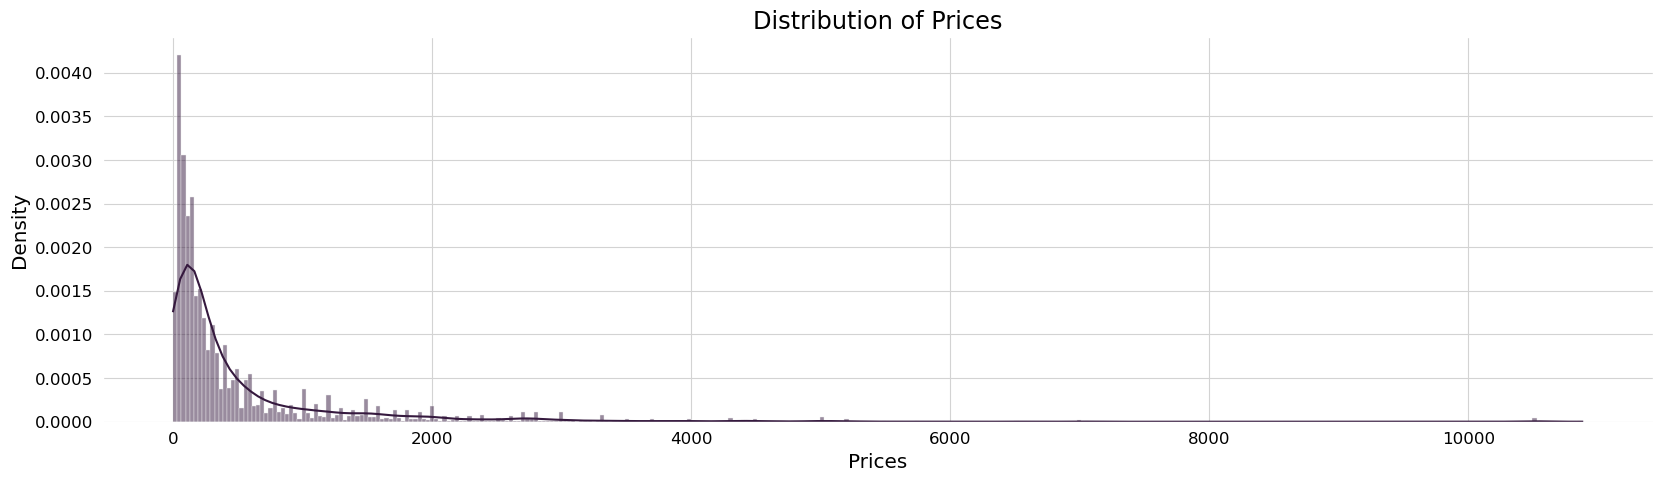

In [24]:
sns.histplot(df['price'], kde=True, stat='density')

set_image('Distribution of Prices', 'Prices', 'Density')

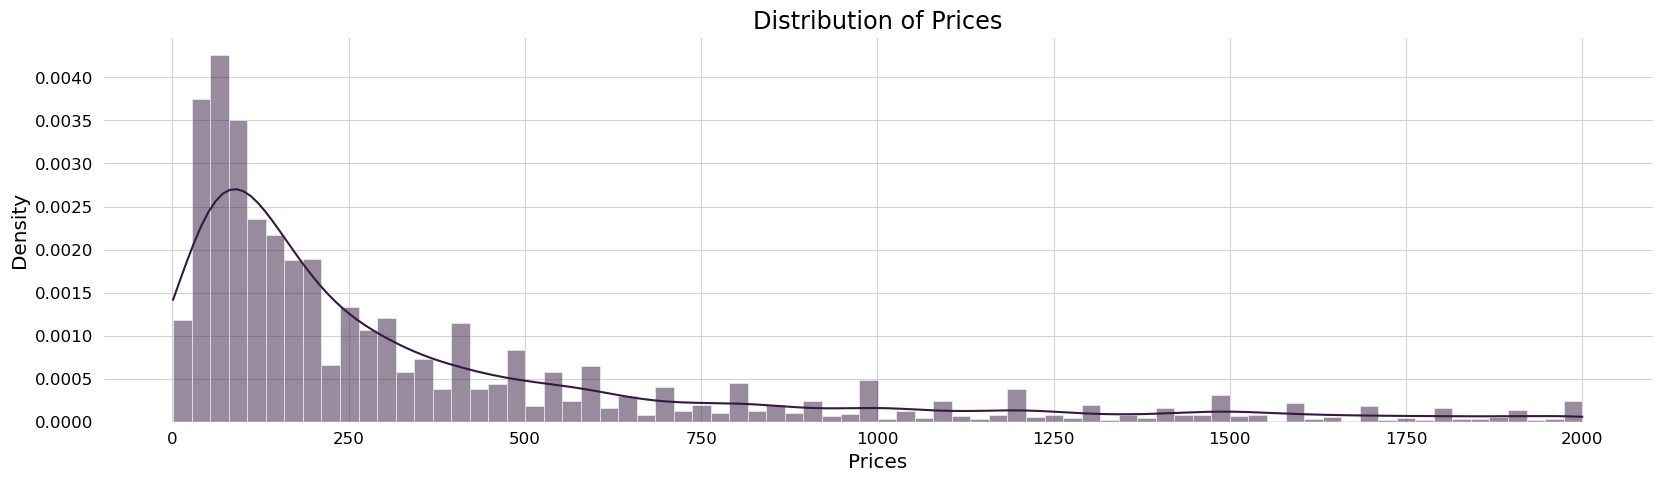

In [25]:
aux1 = df.loc[df['price'] <= 2000, :]

sns.histplot(aux1['price'], kde=True, stat='density')

set_image('Distribution of Prices', 'Prices', 'Density')

***
The processed dataset will be defined as `df` meanwhile we will be using `df+number` as we develop in the project.

In [26]:
df1 = df.copy()

## 3. Hypotheses

This step of the project was created to formulate thoughts about the data and its potential relationships to guide the data exploration and analysis.

**Background Research:** run a background research on the problem domain and dataset. This research can involve reading relevant literature, talking to domain experts, and understanding the context in which the data was collected.

**Define Objectives:** The question to guide the objectives is "What specific relationships are we trying to explore or validate through these hypotheses?"
***

**Hypothesis 1:** Some merchants sell more than others. 
    - Which merchant sold the most in this year?

**Hypothesis 2:** Some categories sell more than others based on merchant.
    - What are the best selling categories? Overall and by merchant.

**Hypothesis 3:** Products from certain brands sell more than others based on merchant.
    - What are the best selling brands? Overall and by merchant.

**Hypothesis 4:** There are some days that people tend to buy the most.
    - What days sell the most? What is the best day in each merchant?

**Hypothesis 5:** The sales are not the same throughout the months of the year.
    - How sales behave each month? Do they follow the same pattern for each merchant?

**Hypothesis 6:** The sales are distributed irregularly across the weeks.
    - How sales behave throughout the weeks?

## 4. Exploratory Data Analysis

**Exploratory Data Analysis** main objectives:

**Obtain Business Experience** in order to understand the business context and domain knowledge. 

**Validate Business Hypotheses (Insights)** providing a data-driven approach to confirm or challenge what the business believes to be true. This process leads to valuable insights that may guide strategic decisions.

**Find Important Features for the ML Model** to uncover which variables have the most significant impact on the target variable. This knowledge helps to improve the model's predictive performance.

### 4.1. Which merchant sold the most?

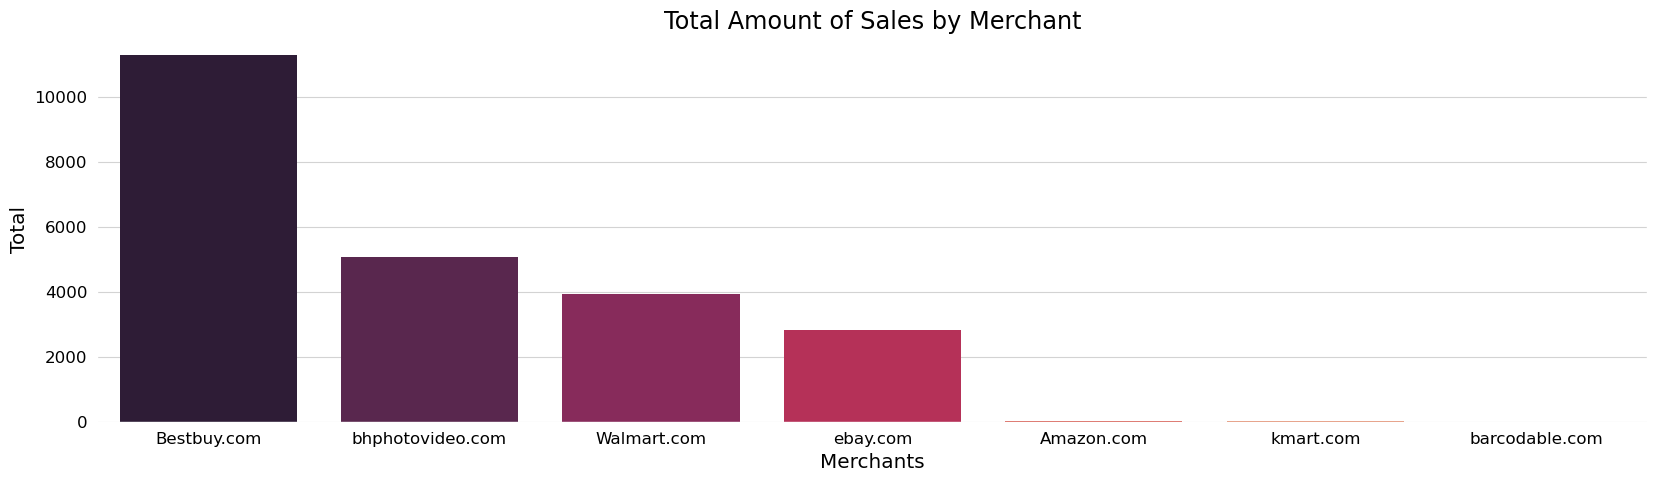

In [27]:
df_aux  = df1[['date', 'merchant']].groupby(['merchant']).count().reset_index().sort_values(by='date', ascending=False)

fig1    = bar_plot(df_aux, 'merchant', 'date', 'Total Amount of Sales by Merchant', 'Merchants', 'Total')

### 4.2. What are the best-selling categories?

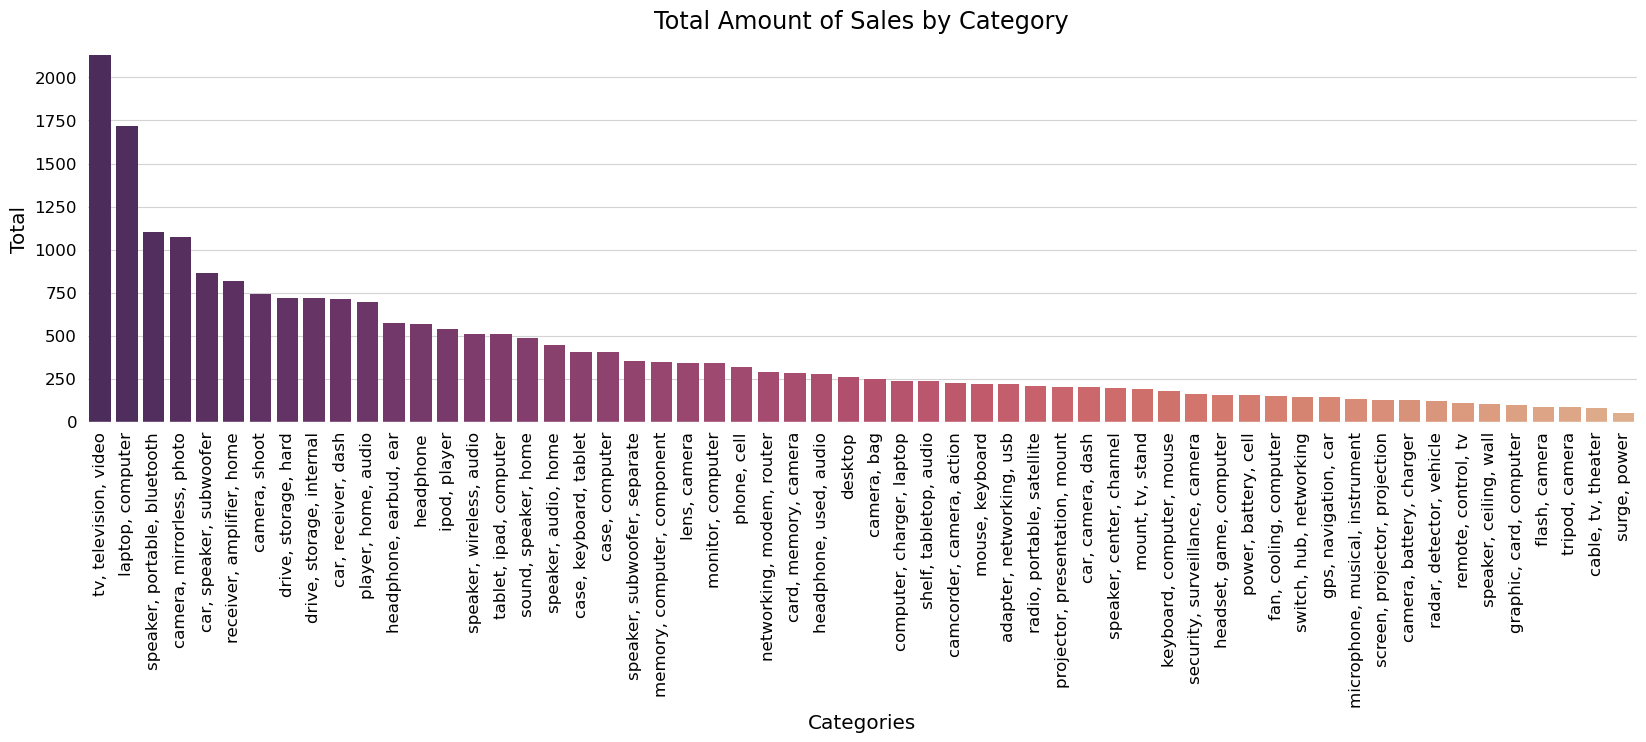

In [28]:
df_aux  = df1[['date', 'category_name']].groupby(['category_name']).count().reset_index().sort_values(by='date', ascending=False)

fig2    = bar_plot(df_aux, 'category_name', 'date', 'Total Amount of Sales by Category', 'Categories', 'Total', 90, 'flare_r')

### 4.3. What is the most sold category by merchant?

In [29]:
df_best     = df1[df1['merchant'] == 'Bestbuy.com']
df_bhp      = df1[df1['merchant'] == 'bhphotovideo.com']
df_walmart  = df1[df1['merchant'] == 'Walmart.com']
df_ebay     = df1[df1['merchant'] == 'ebay.com']

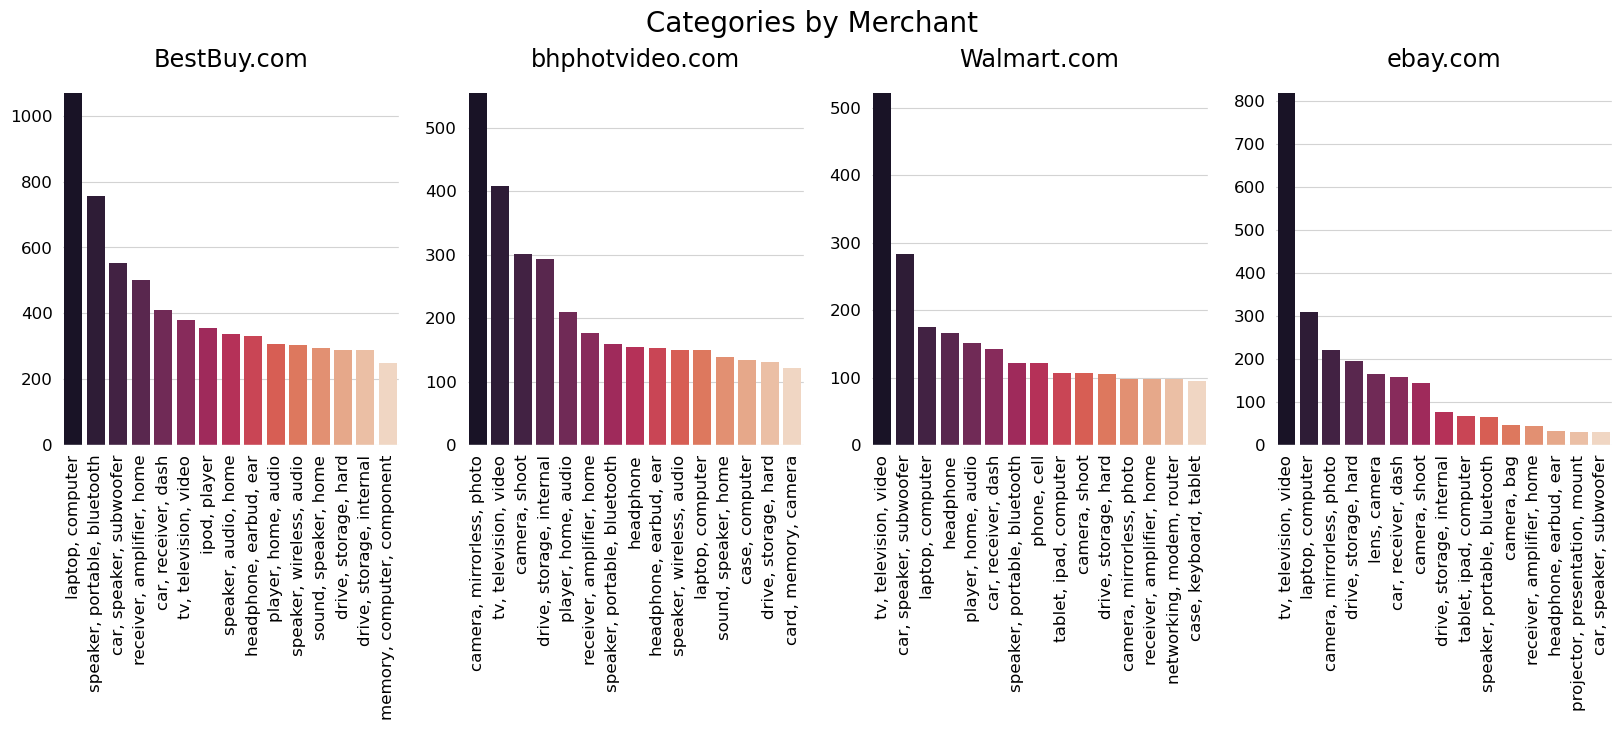

In [30]:
# creating canvas
fig3, axes  = plt.subplots(nrows=1, ncols=4)

# plotting each subplot
plt.subplot(1, 4, 1)
aux1        = df_best[['date', 'category_name']].groupby(['category_name']).count().reset_index().sort_values(by='date', ascending=False)
ax1         = bar_plot(aux1.head(15), 'category_name', 'date', 'BestBuy.com', None, None, 90)

plt.subplot(1, 4, 2)
aux2        = df_bhp[['date', 'category_name']].groupby(['category_name']).count().reset_index().sort_values(by='date', ascending=False)
ax2         = bar_plot(aux2.head(15), 'category_name', 'date', 'bhphotvideo.com', None, None, 90)

plt.subplot(1, 4, 3)
aux3        = df_walmart[['date', 'category_name']].groupby(['category_name']).count().reset_index().sort_values(by='date', ascending=False)
ax3         = bar_plot(aux3.head(15), 'category_name', 'date', 'Walmart.com', None, None, 90)

plt.subplot(1, 4, 4)
aux4        = df_ebay[['date', 'category_name']].groupby(['category_name']).count().reset_index().sort_values(by='date', ascending=False)
ax4         = bar_plot(aux4.head(15), 'category_name', 'date', 'ebay.com', None, None, 90)

# main title
fig3.suptitle('Categories by Merchant', fontsize=20)

# # adjusting spacing
fig3.subplots_adjust(top=0.85)

# show the figure
plt.show()

### 4.4. What are the best-selling brands overall?

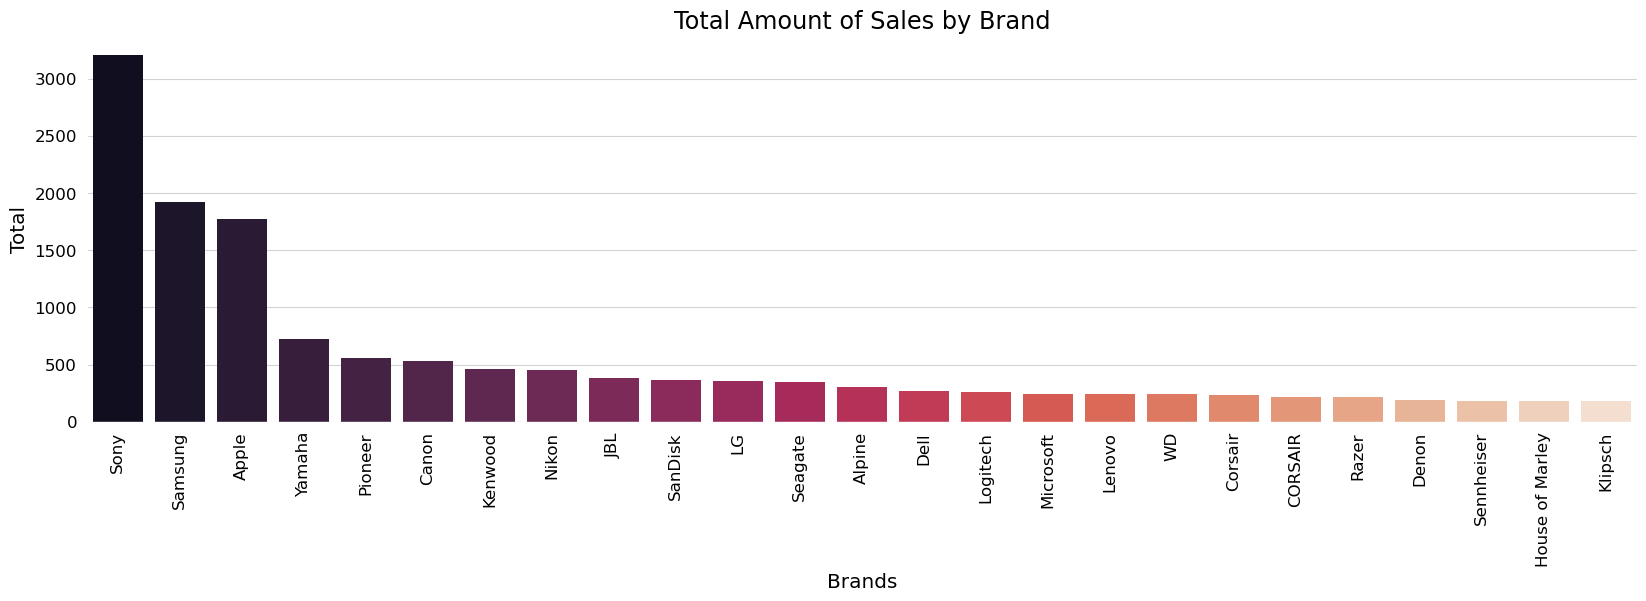

In [31]:
df_aux      = df1[['date', 'brand']].groupby(['brand']).count().reset_index().sort_values(by='date', ascending=False)

fig4        = bar_plot(df_aux.head(25), 'brand', 'date', 'Total Amount of Sales by Brand', 'Brands', 'Total', 90)

### 4.5. What is the most sold brand by merchant?

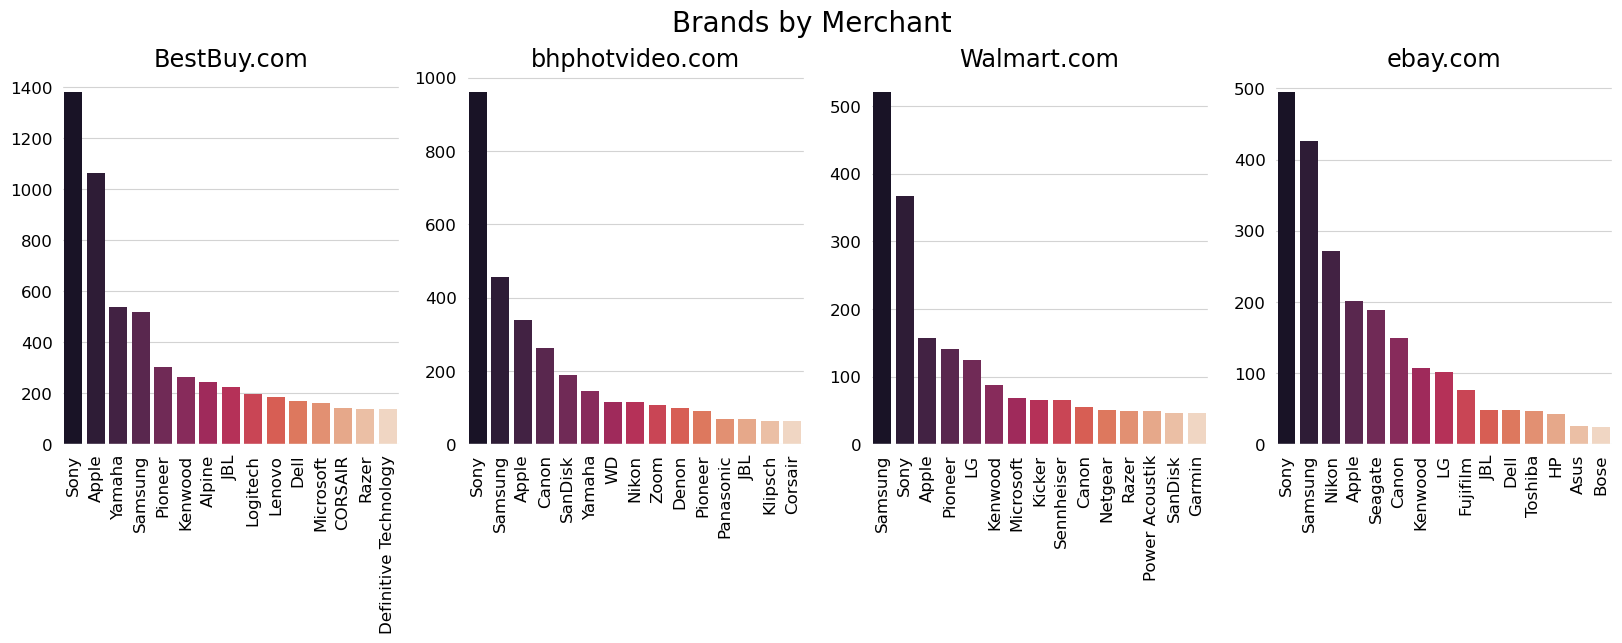

In [32]:
# creating canvas
fig5, axes  = plt.subplots(nrows=1, ncols=4)

# plotting each subplot
plt.subplot(1, 4, 1)
aux1        = df_best[['date', 'brand']].groupby(['brand']).count().reset_index().sort_values(by='date', ascending=False)
ax1         = bar_plot(aux1.head(15), 'brand', 'date', 'BestBuy.com', None, None, 90)

plt.subplot(1, 4, 2)
aux2        = df_bhp[['date', 'brand']].groupby(['brand']).count().reset_index().sort_values(by='date', ascending=False)
ax2         = bar_plot(aux2.head(15), 'brand', 'date', 'bhphotvideo.com', None, None, 90)

plt.subplot(1, 4, 3)
aux3        = df_walmart[['date', 'brand']].groupby(['brand']).count().reset_index().sort_values(by='date', ascending=False)
ax3         = bar_plot(aux3.head(15), 'brand', 'date', 'Walmart.com', None, None, 90)

plt.subplot(1, 4, 4)
aux4        = df_ebay[['date', 'brand']].groupby(['brand']).count().reset_index().sort_values(by='date', ascending=False)
ax4         = bar_plot(aux4.head(15), 'brand', 'date', 'ebay.com', None, None, 90)

# main title
fig5.suptitle('Brands by Merchant', fontsize=20)

# # adjusting spacing
fig5.subplots_adjust(top=0.85)

# show the figure
plt.show()

### 4.6. Which days sell the most?

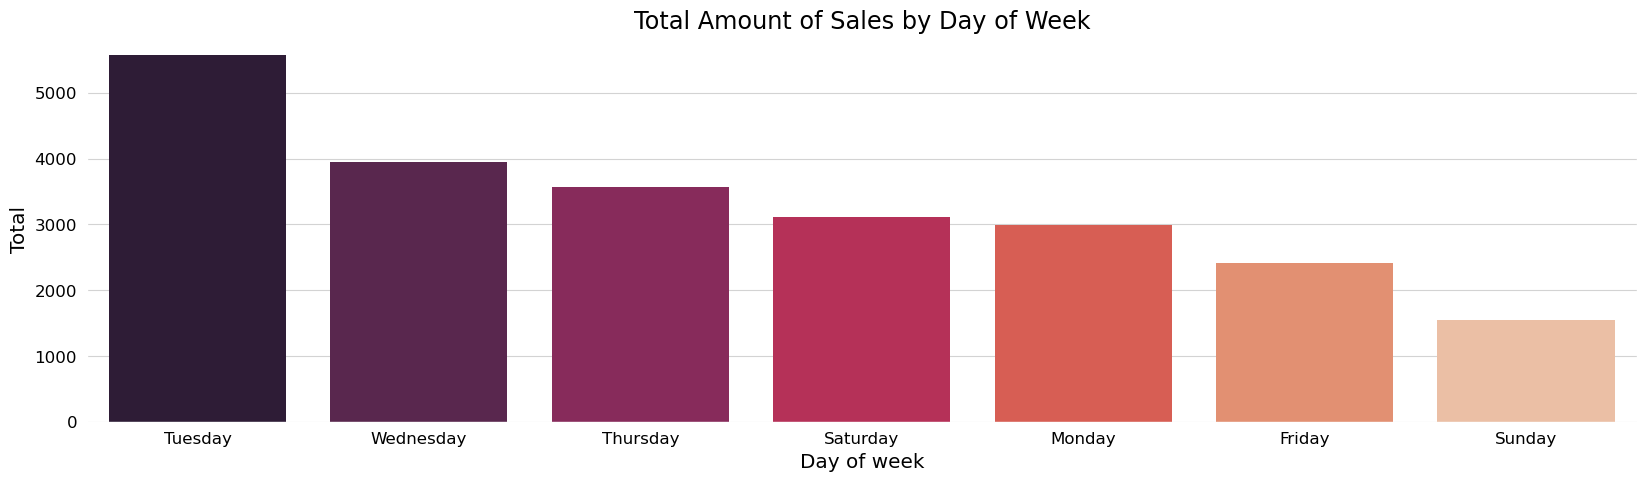

In [33]:
df_aux      = df1[['date', 'day_n']].groupby(['day_n']).count().reset_index().sort_values(by='date', ascending=False)

fig6        = bar_plot(df_aux, 'day_n', 'date', 'Total Amount of Sales by Day of Week', 'Day of week', 'Total')

### 4.7. What is the most selling day by merchant?

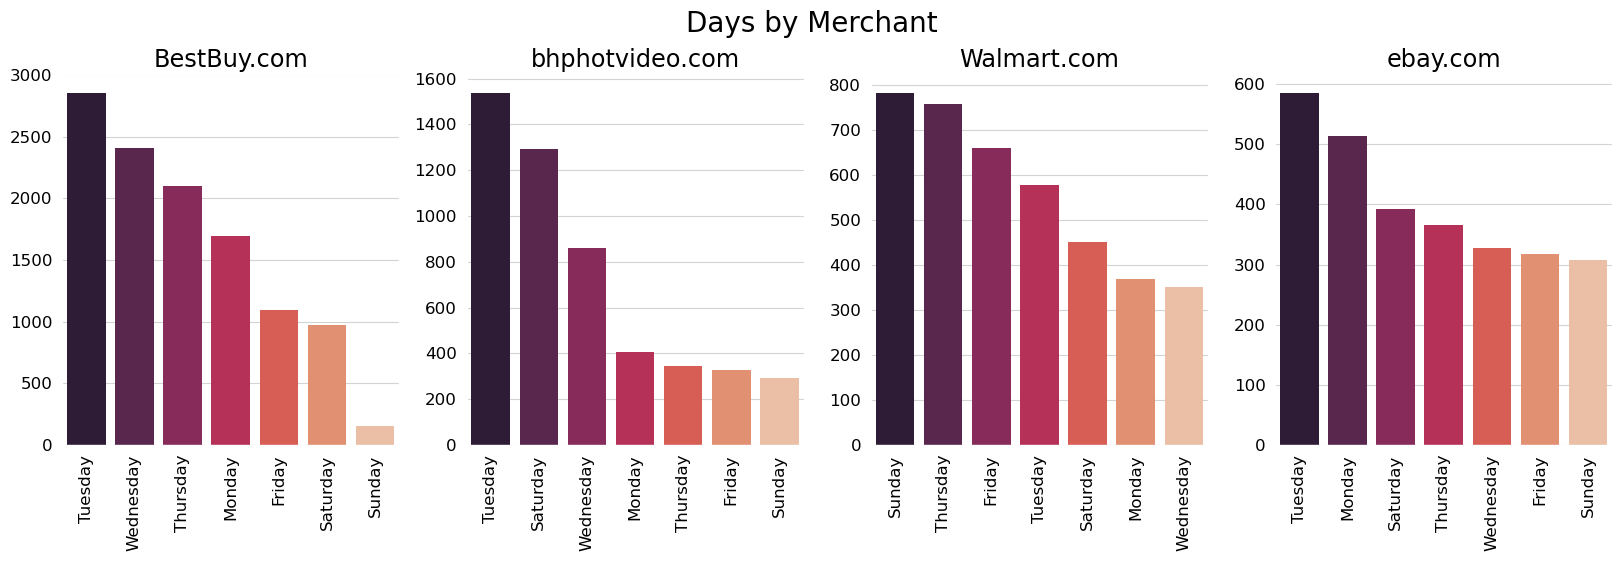

In [34]:
# creating canvas
fig7, axes  = plt.subplots(nrows=1, ncols=4)

# plotting each subplot
plt.subplot(1, 4, 1)
aux1        = df_best[['date', 'day_n']].groupby(['day_n']).count().reset_index().sort_values(by='date', ascending=False)
ax1         = bar_plot(aux1, 'day_n', 'date', 'BestBuy.com', None, None, 90)

plt.subplot(1, 4, 2)
aux2        = df_bhp[['date', 'day_n']].groupby(['day_n']).count().reset_index().sort_values(by='date', ascending=False)
ax2         = bar_plot(aux2, 'day_n', 'date', 'bhphotvideo.com', None, None, 90)

plt.subplot(1, 4, 3)
aux3        = df_walmart[['date', 'day_n']].groupby(['day_n']).count().reset_index().sort_values(by='date', ascending=False)
ax3         = bar_plot(aux3, 'day_n', 'date', 'Walmart.com', None, None, 90)

plt.subplot(1, 4, 4)
aux4        = df_ebay[['date', 'day_n']].groupby(['day_n']).count().reset_index().sort_values(by='date', ascending=False)
ax4         = bar_plot(aux4, 'day_n', 'date', 'ebay.com', None, None, 90)

# main title
fig7.suptitle('Days by Merchant', fontsize=20)

# # adjusting spacing
fig7.subplots_adjust(top=0.85)

# show the figure
plt.show()

### 4.8. Which months sell the most?

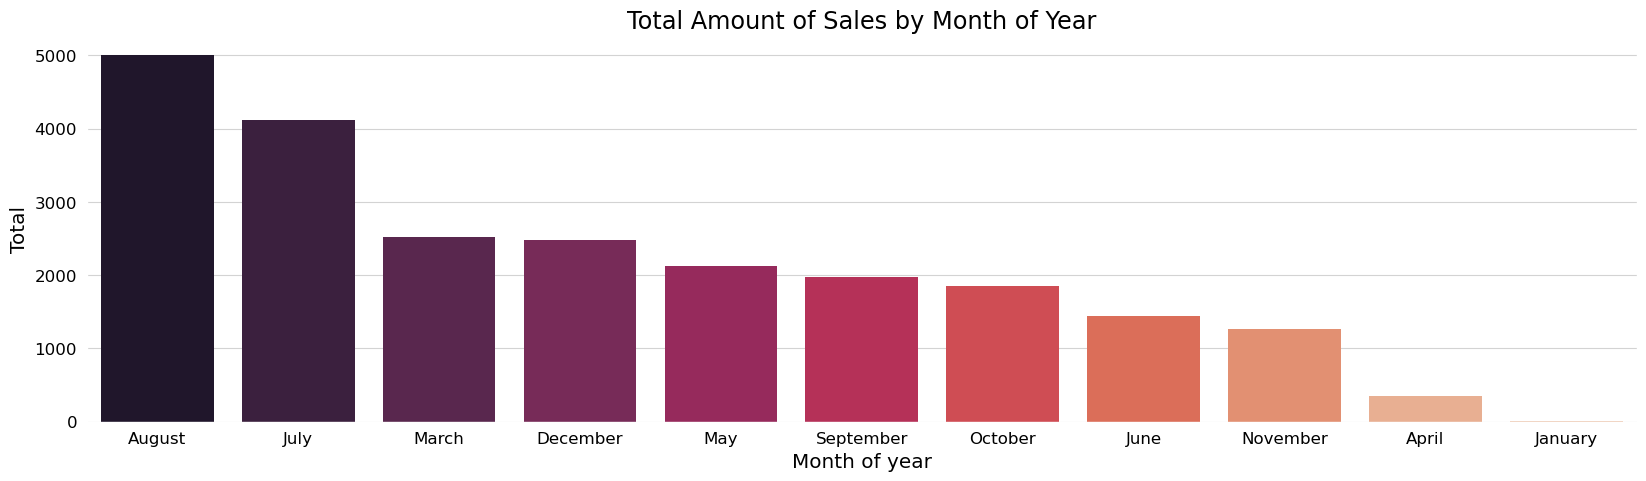

In [35]:
df_aux  = df1[['date', 'month_n']].groupby(['month_n']).count().reset_index().sort_values(by='date', ascending=False)

fig8    = bar_plot(df_aux, 'month_n', 'date', 'Total Amount of Sales by Month of Year', 'Month of year', 'Total')

### 4.9. Which months sell the most by merchant?

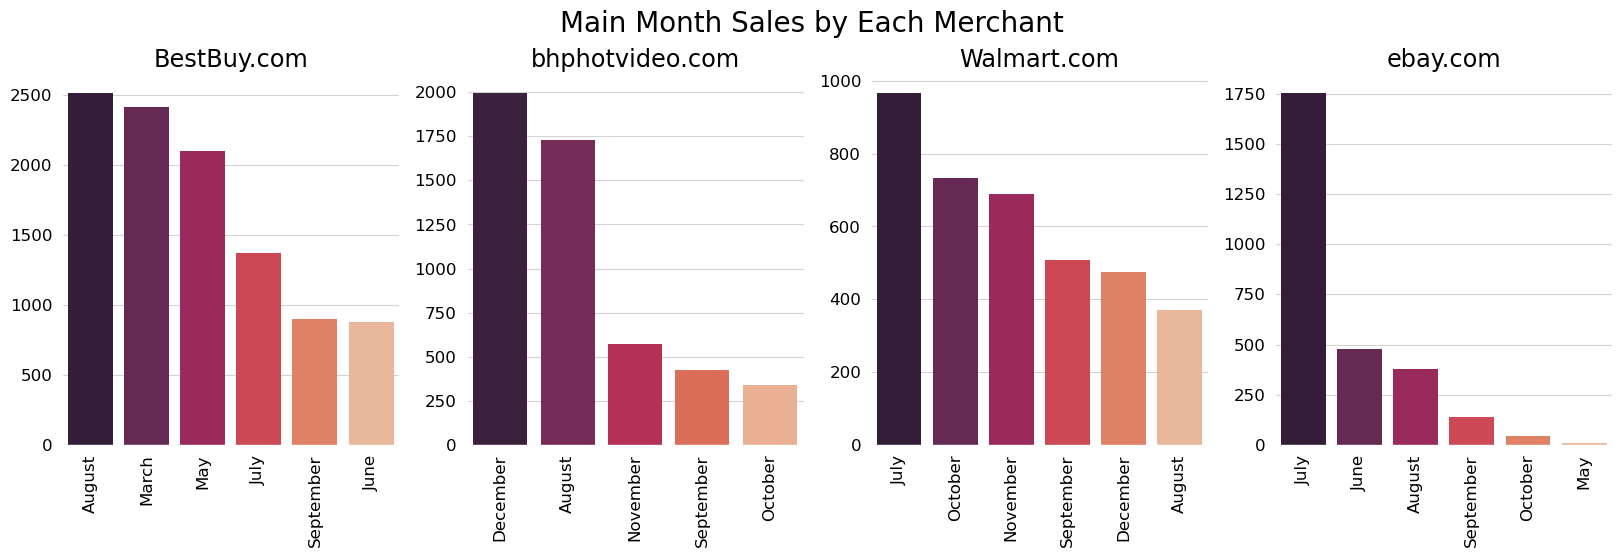

In [36]:
# creating canvas
fig9, axes  = plt.subplots(nrows=1, ncols=4)

# plotting each subplot
plt.subplot(1, 4, 1)
aux1        = df_best[['date', 'month_n']].groupby(['month_n']).count().reset_index().sort_values(by='date', ascending=False)
ax1         = bar_plot(aux1.head(6), 'month_n', 'date', 'BestBuy.com', None, None, 90)

plt.subplot(1, 4, 2)
aux2        = df_bhp[['date', 'month_n']].groupby(['month_n']).count().reset_index().sort_values(by='date', ascending=False)
ax2         = bar_plot(aux2.head(6), 'month_n', 'date', 'bhphotvideo.com', None, None, 90)

plt.subplot(1, 4, 3)
aux3        = df_walmart[['date', 'month_n']].groupby(['month_n']).count().reset_index().sort_values(by='date', ascending=False)
ax3         = bar_plot(aux3.head(6), 'month_n', 'date', 'Walmart.com', None, None, 90)

plt.subplot(1, 4, 4)
aux4        = df_ebay[['date', 'month_n']].groupby(['month_n']).count().reset_index().sort_values(by='date', ascending=False)
ax4         = bar_plot(aux4.head(6), 'month_n', 'date', 'ebay.com', None, None, 90)

# main title
fig9.suptitle('Main Month Sales by Each Merchant', fontsize=20)

# settings
fig9.subplots_adjust(top=0.85)

# show the figure
plt.show()

### 4.10. Which weeks sell most?

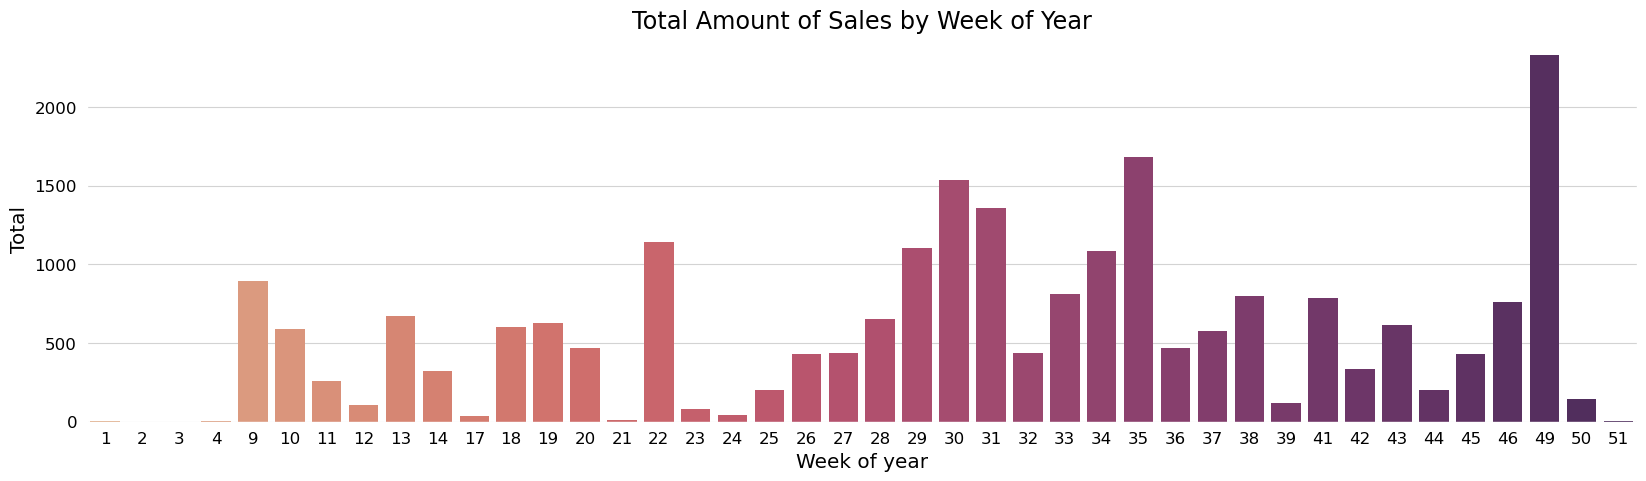

In [37]:
df_aux      = df1[['date', 'week_number']].groupby(['week_number']).count().reset_index()

fig10       = bar_plot(df_aux, 'week_number', 'date', 'Total Amount of Sales by Week of Year', 'Week of year', 'Total', palette='flare')

### 4.11. Best-selling weeks by merchant

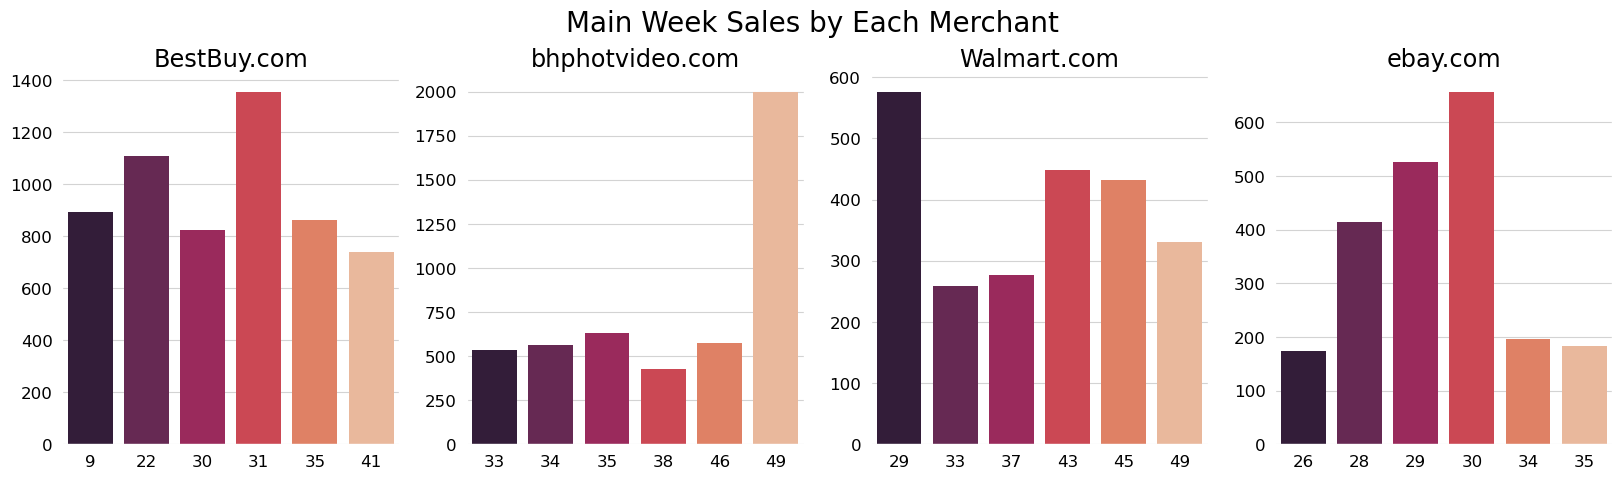

In [38]:
# creating canvas
fig11, axes = plt.subplots(nrows=1, ncols=4)

# plotting each subplot
plt.subplot(1, 4, 1)
aux1        = df_best[['date', 'week_number']].groupby(['week_number']).count().reset_index().sort_values(by='date', ascending=False)
ax1         = bar_plot(aux1.head(6), 'week_number', 'date', 'BestBuy.com', None, None)

plt.subplot(1, 4, 2)
aux2        = df_bhp[['date', 'week_number']].groupby(['week_number']).count().reset_index().sort_values(by='date', ascending=False)
ax2         = bar_plot(aux2.head(6), 'week_number', 'date', 'bhphotvideo.com', None, None)

plt.subplot(1, 4, 3)
aux3        = df_walmart[['date', 'week_number']].groupby(['week_number']).count().reset_index().sort_values(by='date', ascending=False)
ax3         = bar_plot(aux3.head(6), 'week_number', 'date', 'Walmart.com', None, None)

plt.subplot(1, 4, 4)
aux4        = df_ebay[['date', 'week_number']].groupby(['week_number']).count().reset_index().sort_values(by='date', ascending=False)
ax4         = bar_plot(aux4.head(6), 'week_number', 'date', 'ebay.com', None, None)

# main title
fig11.suptitle('Main Week Sales by Each Merchant', fontsize=20)

# settings
fig11.subplots_adjust(top=0.85)

# show the figure
plt.show()

## 5. Feature Engineering

This step involves the creation of new features or the transformation of existing ones to improve the dataset and enhance its performance during Exploratory Data Analysis.

Since we have `'bestbuy.com'` as the top saler and `'laptop, computer'` as it's most sold category, the analysis will be based on them.

In [39]:
aux1 = df_best[df_best['category_name'] == 'laptop, computer']['name'].unique().tolist()

print('There are {} unique laptops/computers.'.format(len(aux1)),'\n')

for i in aux1:
    print(i)

There are 39 unique laptops/computers. 

MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"
Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"
Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"
Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"
Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"
HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"
Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"
Details About Razer Blade Laptop 14 Full Hd (i77700hq"
12 MacBook (Mid 2017, Gold)
Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256

### 5.1. Dataframes Creation & Filtering

In [40]:
df_best_laptop = df_best[df_best['category_name'] == 'laptop, computer']
df_best_laptop.head()

,date,cluster,category_name,name,price,disc_price,merchant,disc_percentage,is_sale,brand,day_n,month,month_n,day,week_number,price_std
1792,2017-06-29,20,"laptop, computer",MSI - WS Series 15.6 Laptop - Intel Core i7 - ...,2299.990,2299.990,Bestbuy.com,0.000,0,MSI,Thursday,6,June,29,26,25.820
1793,2017-10-10,20,"laptop, computer",MSI - WS Series 15.6 Laptop - Intel Core i7 - ...,2399.990,2399.990,Bestbuy.com,0.000,0,MSI,Tuesday,10,October,10,41,25.820
1794,2017-09-12,20,"laptop, computer",MSI - WS Series 15.6 Laptop - Intel Core i7 - ...,2399.990,2399.990,Bestbuy.com,0.000,0,MSI,Tuesday,9,September,12,37,25.820
1795,2017-09-06,20,"laptop, computer",MSI - WS Series 15.6 Laptop - Intel Core i7 - ...,2399.990,2399.990,Bestbuy.com,0.000,0,MSI,Wednesday,9,September,6,36,25.820
1796,2017-08-30,20,"laptop, computer",MSI - WS Series 15.6 Laptop - Intel Core i7 - ...,2399.990,2399.990,Bestbuy.com,0.000,0,MSI,Wednesday,8,August,30,35,25.820


In [41]:
df_best_laptop = df_best_laptop.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date': 'count'}).reset_index()
df_best_laptop

,name,week_number,disc_price,date
0,"12 MacBook (Mid 2017, Gold)",30,1599.990,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.990,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.990,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.990,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.490,4
...,...,...,...,...
454,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,31,610.990,4
455,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,34,600.990,2
456,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,35,600.990,2
457,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,38,591.490,2


In [42]:
# pivoting the price dataframe
x_price = df_best_laptop.pivot(index= 'week_number' , columns= 'name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records())

# pivoting the demand dataframe
y_demand = df_best_laptop.pivot(index= 'week_number' , columns= 'name', values='date')
y_demand = pd.DataFrame(y_demand.to_records())

## 6. New Data Exploration

In [43]:
# if the product is not sold, the price of it stays the same, and we can fill it's missing values with their respective median values. but unlike the price, the demand for the product on those not selling days is 0.
# using median to fill price missing values because median is more robust to price fluctuations

aux1 = x_price.median()
x_price.fillna(aux1, inplace=True)

# using zeros to fill demand missing values
y_demand.fillna(0, inplace=True)

In [44]:
x_price.describe()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
count,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,...,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000
mean,27.077,1547.125,1295.990,413.187,949.298,2607.394,2346.913,299.721,834.028,242.479,...,819.221,464.413,209.663,602.971,414.605,343.163,2396.144,847.471,4164.798,604.682
std,12.182,26.156,14.601,15.728,8.559,115.068,124.950,16.672,28.356,14.295,...,3.922,16.588,18.979,39.576,29.234,17.759,19.612,75.143,151.753,14.004
min,4.000,1454.990,1234.990,372.995,911.990,2327.990,2023.990,237.490,764.990,199.990,...,799.990,427.490,170.990,513.990,314.990,316.990,2299.990,554.990,3674.990,569.990
25%,18.250,1551.990,1299.990,415.495,949.990,2618.990,2353.990,304.990,829.990,249.000,...,819.990,463.740,218.490,594.365,415.990,337.490,2399.990,853.740,4179.990,603.490
50%,29.000,1551.990,1299.990,415.495,949.990,2618.990,2353.990,304.990,829.990,249.000,...,819.990,463.740,218.490,601.490,415.990,337.490,2399.990,853.740,4179.990,610.990
75%,35.750,1551.990,1299.990,415.495,949.990,2618.990,2353.990,304.990,829.990,249.000,...,819.990,463.740,218.490,612.365,415.990,337.490,2399.990,853.740,4179.990,610.990
max,49.000,1599.990,1299.990,449.000,969.990,2799.990,2599.990,313.490,899.990,249.000,...,819.990,499.990,229.990,664.990,474.990,383.990,2399.990,949.990,4399.990,617.490


In [45]:
ranges      = x_price.apply(lambda x: x.max() - x.min())
skewness    = x_price.apply(lambda x: x.skew())
kurtosis    = x_price.apply(lambda x: x.kurtosis())

df_aux      = pd.DataFrame({'Range': ranges, 'Skewness': skewness, 'Kurtosis': kurtosis})
df_aux

,Range,Skewness,Kurtosis
week_number,45.000,-0.186,-0.905
"12 MacBook (Mid 2017, Gold)",145.000,-2.458,8.310
"12 MacBook (Mid 2017, Silver)",65.000,-3.735,13.785
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,76.005,-1.054,2.831
"13.3 MacBook Air (Mid 2017, Silver)",58.000,-2.976,16.702
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",472.000,-1.132,2.049
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",576.000,-0.275,1.347
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,76.000,-2.917,8.218
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",135.000,0.937,2.944
Acer 15.6 Chromebook CB5-571-C4G4,49.010,-2.306,4.514


In [46]:
y_demand.describe()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
count,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,...,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000,26.000
mean,27.077,0.962,0.385,1.038,0.385,1.154,3.231,0.538,0.385,0.769,...,0.692,0.692,0.962,1.154,0.615,1.154,0.577,1.000,1.000,1.269
std,12.182,1.800,0.637,1.148,0.804,1.642,3.963,0.905,0.637,0.951,...,0.618,1.050,0.999,1.120,1.098,1.287,0.643,1.265,1.233,1.251
min,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,18.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,29.000,0.000,0.000,0.500,0.000,0.000,1.000,0.000,0.000,1.000,...,1.000,0.000,0.500,1.500,0.000,1.000,0.500,0.000,0.500,2.000
75%,35.750,2.000,1.000,2.000,0.000,2.000,5.500,1.500,1.000,1.000,...,1.000,1.000,2.000,2.000,1.500,2.000,1.000,2.000,2.000,2.000
max,49.000,8.000,2.000,4.000,2.000,6.000,12.000,2.000,2.000,4.000,...,2.000,4.000,2.000,4.000,4.000,4.000,2.000,4.000,4.000,4.000


In [47]:
ranges      = y_demand.apply(lambda x: x.max() - x.min())
skewness    = y_demand.apply(lambda x: x.skew())
kurtosis    = y_demand.apply(lambda x: x.kurtosis())

df_aux      = pd.DataFrame({'Range': ranges, 'Skewness': skewness, 'Kurtosis': kurtosis})
df_aux

,Range,Skewness,Kurtosis
week_number,45.000,-0.186,-0.905
"12 MacBook (Mid 2017, Gold)",8.000,2.739,9.025
"12 MacBook (Mid 2017, Silver)",2.000,1.474,1.190
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,4.000,0.607,-0.428
"13.3 MacBook Air (Mid 2017, Silver)",2.000,1.659,0.807
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",6.000,1.438,1.673
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",12.000,0.951,-0.225
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,2.000,1.105,-0.850
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",2.000,1.474,1.190
Acer 15.6 Chromebook CB5-571-C4G4,4.000,1.711,4.067


### 6.1. Visualizing Price and Demand data of the products

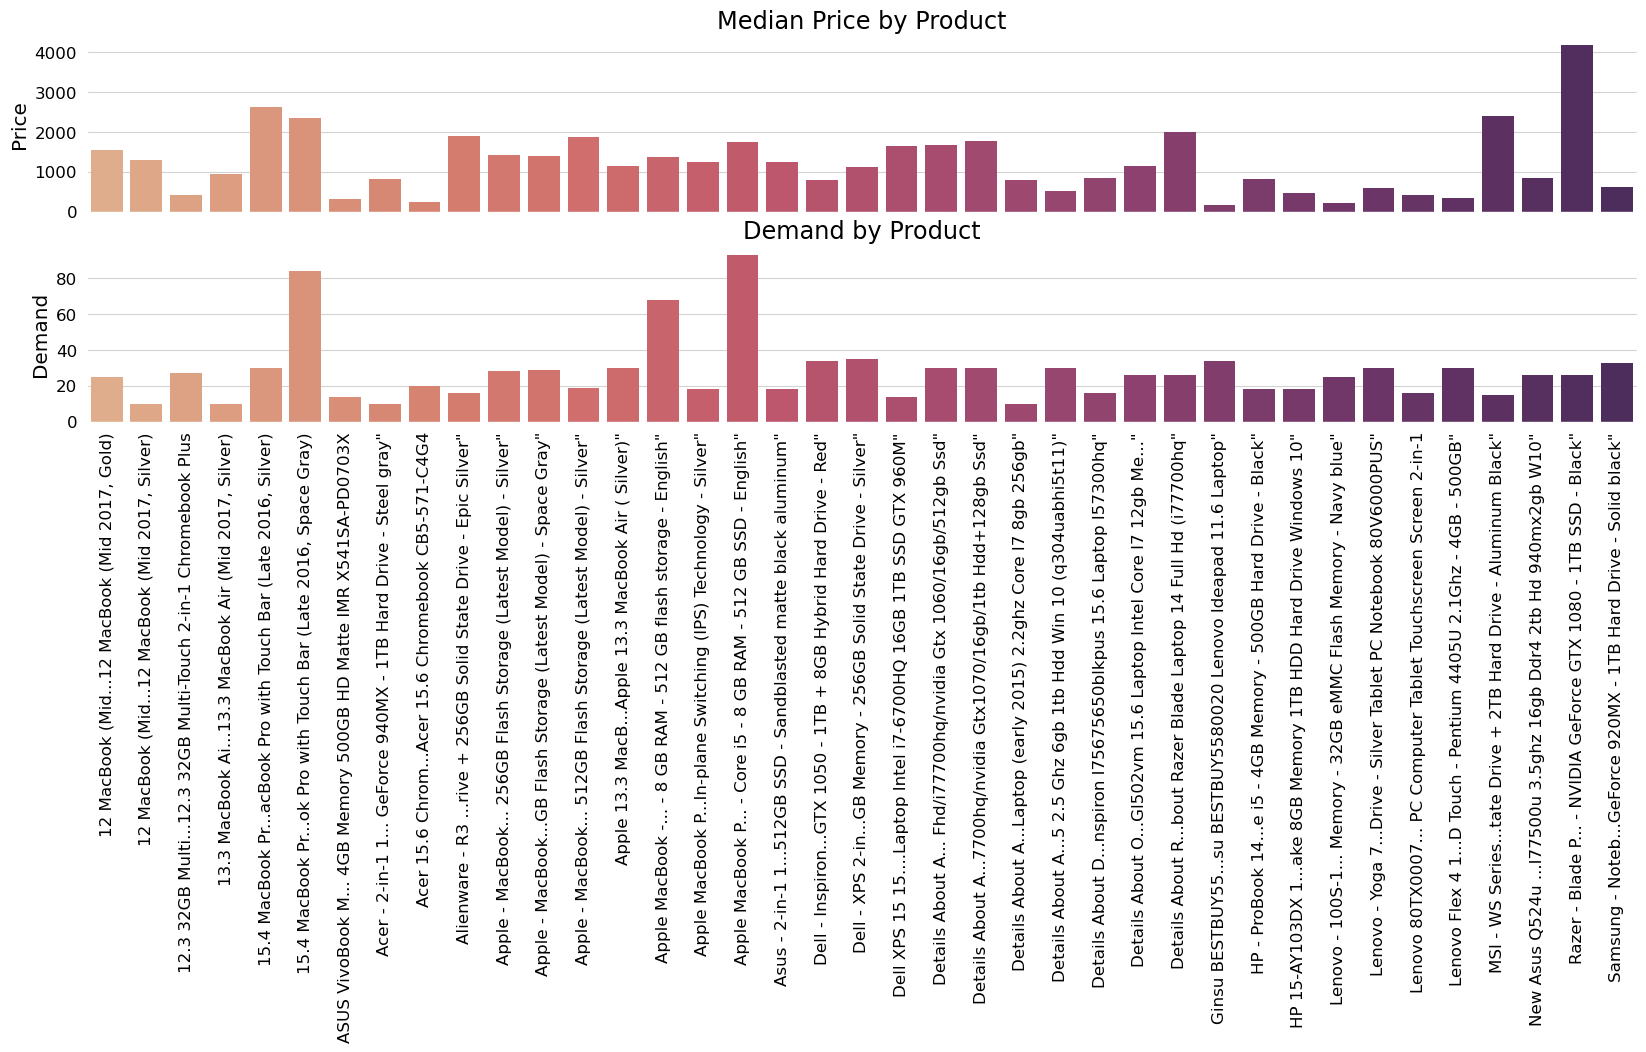

In [48]:
## data manipulation
aux1 = pd.DataFrame(x_price.apply( lambda x: x.median())).reset_index().drop(0, axis=0)
aux1.columns = ['products', 'price']

aux2 = pd.DataFrame(y_demand.apply( lambda x: x.sum())).reset_index().drop(0, axis=0)
aux2.columns = ['products', 'demand']
aux2['products'] = aux2['products'].str.slice(0, 15) + '...' + aux2['products'].str.slice(-45)

## plots
# creating canvas
fig12, axes = plt.subplots(nrows=2, ncols=1)

# plotting each subplot
plt.subplot(2, 1, 1)
ax1 = bar_plot(aux1, 'products', 'price', 'Median Price by Product', None, 'Price', palette='flare')
plt.xticks([])

plt.subplot(2, 1, 2)
ax2 = bar_plot(aux2, 'products', 'demand', 'Demand by Product', None, 'Demand', 90, palette='flare')

# show the figure
plt.show()


## 7. Price Elasticity

### 7.1. Price Elasticity demo.

In [49]:
x_laptop = x_price['12 MacBook (Mid 2017, Gold)']
y_laptop = y_demand['12 MacBook (Mid 2017, Gold)']

X_laptop = sm.add_constant(x_laptop)

model = sm.OLS(y_laptop, X_laptop)

results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Mon, 23 Oct 2023   Prob (F-statistic):              0.159
Time:                                 14:13:11   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### 7.2. Calculating Price Elasticity of Demand for all products

In [50]:
# creating a dictionary for output
results_values_laptop = {
    'product_name': [],
    'price_elasticity': [],
    'mean_price': [],
    'std_price': [],
    'mean_quantity': [],
    'std_quantity': [],
    'intercept': [],
    'slope': [],
    'rsquared': [],
    'p_value': []
}

# calculating price elasticity 
for column in x_price.columns[1:]:
    column_points = []

    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    
    df = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])
    
    x_laptop = df['x_price']
    y_laptop = df['y_demand']
    X_laptop = sm.add_constant(x_laptop)
    
    # machine learning model
    model   = sm.OLS(y_laptop, X_laptop)
    results = model.fit()

    if results.f_pvalue < 0.05:
        
        mean_price          = np.mean(x_laptop)
        std_price           = np.std(x_laptop)
        mean_quantity       = np.mean(y_laptop)
        std_quantity        = np.std(y_laptop)
        intercept, slope    = results.params
        rsquared            = results.rsquared
        p_value             = results.f_pvalue

        price_elasticity = slope*(mean_price/mean_quantity)

        results_values_laptop['product_name'].append(column)
        results_values_laptop['price_elasticity'].append(price_elasticity)
        results_values_laptop['mean_price'].append(mean_price)
        results_values_laptop['std_price'].append(std_price)
        results_values_laptop['mean_quantity'].append(mean_quantity)
        results_values_laptop['std_quantity'].append(std_quantity)
        results_values_laptop['intercept'].append(intercept)
        results_values_laptop['slope'].append(slope)
        results_values_laptop['rsquared'].append(rsquared)
        results_values_laptop['p_value'].append(p_value)

# crating the dataframe for output
df_elasticity = pd.DataFrame.from_dict(results_values_laptop)
df_elasticity

,product_name,price_elasticity,mean_price,std_price,mean_quantity,std_quantity,intercept,slope,rsquared,p_value
0,"12 MacBook (Mid 2017, Silver)",-65.116,1295.990,14.318,0.385,0.625,25.429,-0.019,0.196,0.024
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.040,299.721,16.348,0.538,0.887,9.175,-0.029,0.282,0.005
2,Acer 15.6 Chromebook CB5-571-C4G4,-8.433,242.479,14.017,0.769,0.933,7.256,-0.027,0.162,0.042
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.019,1224.221,157.354,0.692,1.101,4.859,-0.003,0.236,0.012
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.204,790.759,20.177,1.308,1.352,31.651,-0.038,0.328,0.002
5,Details About Apple Macbook Air 13.3 Laptop (e...,-68.166,795.509,14.820,0.385,0.684,26.602,-0.033,0.510,0.000
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049,209.663,18.610,0.962,0.980,6.778,-0.028,0.278,0.006


In [51]:
# creating a ranking column
df_elasticity['ranking'] = df_elasticity.loc[ : ,'price_elasticity'].rank( ascending = True).astype(int)
df_elasticity = df_elasticity.sort_values('ranking', ascending = True).reset_index(drop = True)
df_elasticity

,product_name,price_elasticity,mean_price,std_price,mean_quantity,std_quantity,intercept,slope,rsquared,p_value,ranking
0,Details About Apple Macbook Air 13.3 Laptop (e...,-68.166,795.509,14.820,0.385,0.684,26.602,-0.033,0.510,0.000,1
1,"12 MacBook (Mid 2017, Silver)",-65.116,1295.990,14.318,0.385,0.625,25.429,-0.019,0.196,0.024,2
2,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.204,790.759,20.177,1.308,1.352,31.651,-0.038,0.328,0.002,3
3,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.040,299.721,16.348,0.538,0.887,9.175,-0.029,0.282,0.005,4
4,Acer 15.6 Chromebook CB5-571-C4G4,-8.433,242.479,14.017,0.769,0.933,7.256,-0.027,0.162,0.042,5
5,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049,209.663,18.610,0.962,0.980,6.778,-0.028,0.278,0.006,6
6,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.019,1224.221,157.354,0.692,1.101,4.859,-0.003,0.236,0.012,7


### 7.3. Visualizing Price Elasticity by Product Results

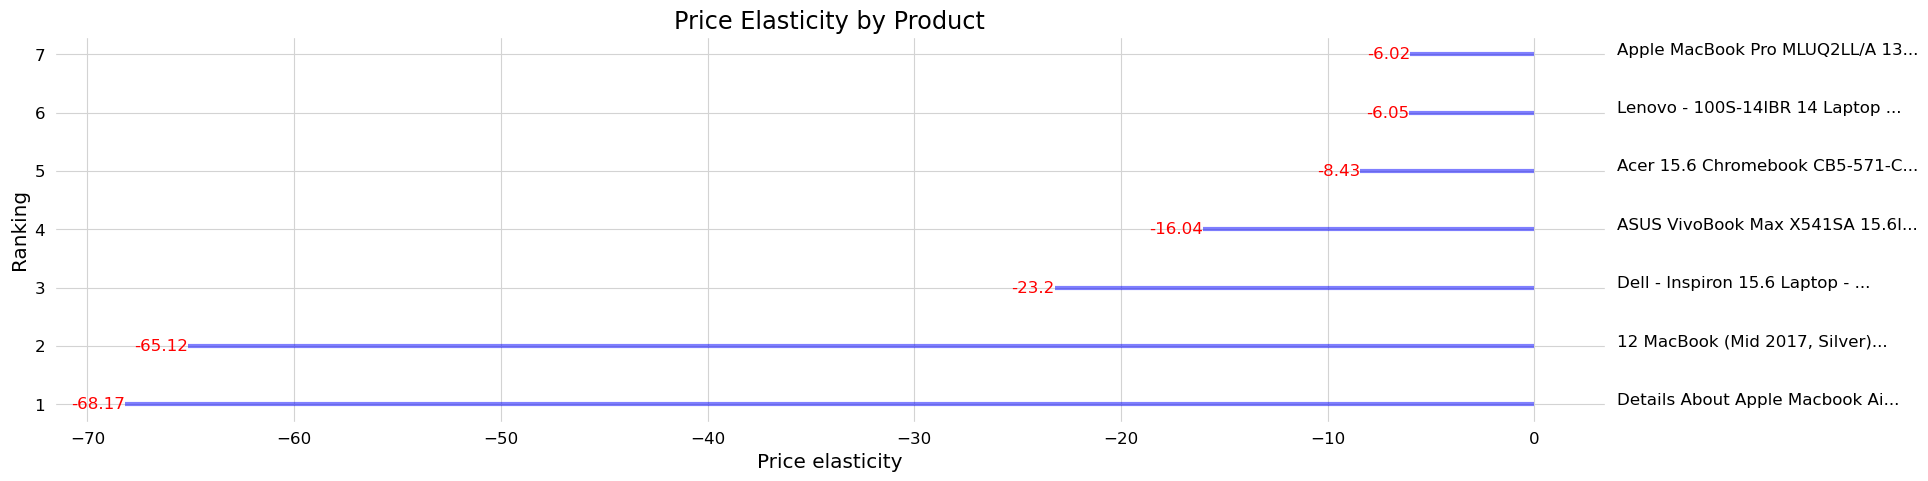

In [52]:
fig13 = plt.hlines(y = df_elasticity['ranking'], xmin = 0, xmax = df_elasticity['price_elasticity'], alpha = 0.5, linewidth = 3, color = 'blue')

for name, p in zip(df_elasticity['product_name'].str.slice(0, 30) + '...', df_elasticity['ranking']):
    plt.text(4, p, name)

# creating elasticity labels
for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left', 
                                verticalalignment='center', 
                                fontdict={'color':'red' if x < 0 else 'green', 'size':12})
    
fig13 = set_image('Price Elasticity by Product', 'Price elasticity', 'Ranking')

plt.savefig('price_elasticity_by_product.png')

## 8. Business Performance

In [53]:
revenue_result = {
    'product_name': [],
    'yrly_revenue': [],
    'price_at_risk':[],
    'new_revenue':[],
    'revenue_variation':[],
    'pct_variation':[]
}

for i in range(len(df_elasticity)):
    yrly_mean_price     = x_price[df_elasticity['product_name'][i]].mean()
    yrly_demand         = y_demand[df_elasticity['product_name'][i]].sum()

    # applying a discount of 10% off
    discounted_price    = yrly_mean_price * 0.9
    new_demmand         = df_elasticity['price_elasticity'][i] * (-0.1)

    new_demmand         = yrly_demand + (yrly_demand*new_demmand)

    yrly_revenue        = yrly_mean_price * yrly_demand
    price_risk          = yrly_revenue - (yrly_revenue * 0.9)
    new_revenue         = discounted_price * new_demmand

    revenue_result['product_name'].append(df_elasticity['product_name'][i])
    revenue_result['yrly_revenue'].append(yrly_revenue)
    revenue_result['price_at_risk'].append(price_risk)
    revenue_result['new_revenue'].append(new_revenue)
    revenue_result['revenue_variation'].append(new_revenue - yrly_revenue)
    revenue_result['pct_variation'].append((new_revenue - yrly_revenue)/yrly_revenue)

# from dictionary to dataframe
revenue_result = pd.DataFrame.from_dict(revenue_result)

# a copy to use in the presentation
results = revenue_result.copy()

# formatting as monetary values
format_func = lambda x: '${:,.2f}'.format(x)
results[['yrly_revenue', 'price_at_risk', 'new_revenue', 'revenue_variation']] = results[['yrly_revenue', 'price_at_risk', 'new_revenue', 'revenue_variation']].applymap(format_func)

# formatting the 'pct_variation' column as percentage values
results['pct_variation'] = (results['pct_variation']*100).map('{:.2f}%'.format)

# displaying the results
results
# results = results.set_index('product_name')
# results.to_csv('results.csv')

,product_name,yrly_revenue,price_at_risk,new_revenue,revenue_variation,pct_variation
0,Details About Apple Macbook Air 13.3 Laptop (e...,"$7,955.09",$795.51,"$55,963.40","$48,008.31",603.49%
1,"12 MacBook (Mid 2017, Silver)","$12,959.90","$1,295.99","$87,614.15","$74,654.25",576.04%
2,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,"$26,885.81","$2,688.58","$80,343.37","$53,457.56",198.83%
3,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,"$4,196.09",$419.61,"$9,833.82","$5,637.73",134.36%
4,Acer 15.6 Chromebook CB5-571-C4G4,"$4,849.58",$484.96,"$8,045.12","$3,195.53",65.89%
5,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,"$5,241.58",$524.16,"$7,571.17","$2,329.60",44.44%
6,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,"$22,035.98","$2,203.60","$31,768.78","$9,732.80",44.17%


In [54]:
print('The new revenue provides an increase of ${:,.2f} in annual revenue from latptops and computers.'.format(revenue_result['revenue_variation'].sum()))

The new revenue provides an increase of $197,015.78 in annual revenue from latptops and computers.


In [55]:
n = 1

print("""
      The current revenue for product "{}" is {} annually. Considering a 10% promotion on the product's value, we could lose something around {}. 
      However, considering the high price elasticity of demand for the product, the demand for it grows generating an increase of {} in revenue ({}), that is, a new revenue of {} annually.
      """.format(
          results.loc[n, :]['product_name'], results.loc[n, :]['yrly_revenue'], results.loc[n, :]['price_at_risk'], results.loc[n, :]['revenue_variation'], results.loc[n, :]['pct_variation'], results.loc[n, :]['new_revenue']
          ))


      The current revenue for product "12 MacBook (Mid 2017, Silver)" is $12,959.90 annually. Considering a 10% promotion on the product's value, we could lose something around $1,295.99. 
      However, considering the high price elasticity of demand for the product, the demand for it grows generating an increase of $74,654.25 in revenue (576.04%), that is, a new revenue of $87,614.15 annually.
      


In [56]:
# for index, row in results.iterrows():
#     print(
#         """
#         The current revenue for product {} is {} annually. Considering a 10% promotion on the product's value, we could lose something around {}. 
#         However, considering the high price elasticity of demand for the product, the demand for it grows generating an increase of {} in revenue ({}), that is, a new revenue of {} annually.
#         """.format(
#             row['product_name'], row['yrly_revenue'], row['price_at_risk'], row['revenue_variation'], row['pct_variation'], row['new_revenue']
#         ))

## 9. Cross Price Elasticity

In [64]:
def crossprice(df_x, df_y, column_name):
    
    # all values from x_price
    aux1 = x_price.copy()

    # values from y_demand, with the same name as the column
    aux1['y_value-' + column_name] = y_demand[column_name]

    multi_xvalues = aux1.loc[:, aux1.columns[1:-1]]
    multi_yvalues = aux1.loc[:, aux1.columns[-1]]

    # obtaining mean values
    mean_xvalues = np.mean(multi_xvalues)
    mean_yvalues = np.mean(multi_yvalues)

    # linear regression
    X       = sm.add_constant(multi_xvalues)
    model   = sm.OLS(multi_yvalues, X, missing='drop')
    result  = model.fit()

    # obtaining results
    results_summary = result.summary()

    # obtaining p-values
    pvalue = result.pvalues

    # creating a dataframe
    results_as_html     = results_summary.tables[1].as_html()
    aux2       = pd.read_html(results_as_html, header=0, index_col=0)[0]

    # adding p-value to the dataframe
    aux2['p_value'] = pvalue

    # resetting index and changing it to 'name'
    aux2.index.name= 'name'
    aux2.reset_index()

    # calculating cross-prices
    aux2['mean'] = mean_xvalues
    aux2['price_elasticity'] = round((aux2.coef)*(aux2['mean']/mean_yvalues), 2)

    aux2 = aux2.reset_index()
    pvalue_siginicant = aux2['p_value']

    # verifying if the price elasticity is significant
    aux2[column_name + 'CPE'] = np.where((pvalue_siginicant > 0.05), 'No Effect', aux2['price_elasticity'])
    aux2 = aux2.dropna()
    return aux2[['name', column_name + 'CPE']]

# creating a dataframe
df_cross = pd.DataFrame()

# calculating cross-prices for each column
for column in x_price.columns[1:]:
    df_cross[['name_of_the_product', column]] = crossprice(x_price, y_demand, column)

# setting the index
df_cross = df_cross.set_index('name_of_the_product')

# displaying the results
df_cross

,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
name_of_the_product,,,,,,,,,,,,,,,,,,,,,
"12 MacBook (Mid 2017, Gold)",-9.33,18.5,-4.17,-10.06,3.49,4.88,10.34,1.61,4.22,15.08,...,10.28,1.34,0.32,-5.5,14.08,-3.89,12.34,-4.49,7.27,19.02
"12 MacBook (Mid 2017, Silver)",-10.51,-10.45,-10.48,-17.18,-7.97,-7.54,-10.59,-7.41,-5.73,-5.69,...,-8.99,-7.11,-8.76,-12.13,-3.16,-10.11,-11.23,-11.02,-11.53,-8.17
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,-9.5,-8.38,-7.2,-10.42,-6.41,-4.72,-7.75,-3.33,-2.47,-4.63,...,-6.39,-3.58,-6.23,-5.08,-1.61,-7.31,-5.87,-3.55,-8.43,-4.26
"13.3 MacBook Air (Mid 2017, Silver)",0.89,2.71,0.37,2.71,-1.4,-1.56,6.88,-2.22,-0.62,-0.14,...,-1.23,-0.03,-1.18,-3.7,-2.62,-1.07,-1.32,-3.13,-0.38,-0.9
"15.4 MacBook Pro with Touch Bar (Late 2016, Silver)",1.9,-2.03,-15.32,3.39,-37.74,-34.62,-3.39,-38.64,-26.44,-11.86,...,-20.34,-40.68,-18.44,-20.34,-13.13,-24.41,-32.09,-35.98,-15.91,-18.49
"15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",9.52,21.36,2.71,-1.83,17.9,4.79,3.92,8.54,2.75,13.35,...,17.97,11.19,12.2,-4.07,8.77,11.39,14.64,1.64,6.34,4.25
ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,-3.55,-4.29,-2.31,-7.09,-0.65,-2.17,-4.95,1.17,0.02,-3.36,...,-2.38,-0.52,-1.71,-0.6,-0.93,-1.56,-2.81,0.87,-2.28,-0.43
"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",-13.36,-11.71,-12.69,-25.59,-16.34,-22.67,-21.37,-14.96,-4.77,-12.2,...,-22.65,-27.11,-2.86,-34.62,3.12,-14.89,-37.59,-42.12,-35.28,-22.74
Acer 15.6 Chromebook CB5-571-C4G4,-0.13,-1.01,-1.0,-1.77,-0.78,-1.67,0.14,-0.69,-1.39,-1.14,...,-0.98,0.18,-1.82,-1.56,-2.36,-1.18,-1.3,-0.61,0.46,0.78
